**Trabalho de Mineração de Dados - Limpeza e transformação de dados**

Segue uma pequena descrição a respeito das colunas do arquivo de treino:

* Passengerid = Identificador do passageiro do navio
* Survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) se não sobreviveu
* Pclass = Tipo da classe de passagem (onde 1 a melhor classe e 3 a pior classe)
* Name = Nome do passageiro
* Sex = Gênero do passageiro
* Age = Idade do passageiro
* SibSp = Número de irmãos / cônjuges a bordo
* Parch = Número de pais / filhos a bordo
* Ticket = Código do ticket
* Fare = Valor da passagem
* Cabin = Número da Cabine
* Embarked = Local ondem o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df_train = pd.read_csv('train.csv')  #leitura do arquivo de treino

In [4]:
df_train.describe() #descrição do arquivo

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


É possível perceber que a coluna Age possui menos dados que as demais o que pode indicar dados faltantes.


In [5]:
df_train.shape

(891, 12)

O arquivo possui 891 linhas e 12 colunas (ou features)


In [6]:
df_train.info() #informação sobre o arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


É possível observar que o tipo dos dados da idade é float, porém o tipo inteiro representaria melhor os dados da idade.

É possível observar tabém que além de existirem dados faltantes para idade, também existem dados faltantes para embarque e cabines.

In [7]:
df_train.head(10) #visualização de parte do arquivo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


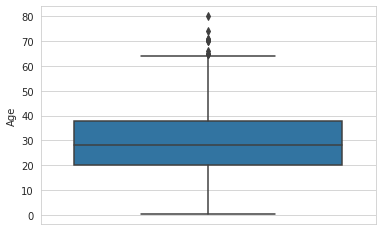

In [8]:
sn.set_style("whitegrid")  
sn.boxplot(y='Age', data=df_train); #gráfico representando as idades das pessoas

É possível observar no gráfico que a idade da maioria dos passageiros está concentrada na faixa entre 20 e +ou- 39 anos de idade, mas observa-se também que existem idades até +ou- 64 anos e 0. Pode-se interpretar como 0 anos os bebês que aindanão completaram 1 ano. Além disso, é possível observar alguns outliers que variam 64 < a 80 anos. Como o ponto mais alto observado na idade é 80 anos, não vejo valores absurdos para esses dados da coluna Age em questão, considerando 0 os bebês.

A seguir as pessoas serão divididas em 2 grupos pelo gênero:

In [9]:
df_train_male = df_train[(df_train.Sex == 'male')]
df_train_female = df_train[(df_train.Sex == 'female')]

A seguir serão corrigidos os valores faltantes da idade dos passageiros de acordo com a média da idade de cada gênero:

In [10]:
df_train.loc[(df_train.Sex == 'male') & (df_train.Age.isnull()), 'Age'] = df_train_male.Age.mean()
df_train.loc[(df_train.Sex == 'female') & (df_train.Age.isnull()), 'Age'] = df_train_female.Age.mean()

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


É possível observar que agora os valores das idades foram corrigidos.

In [12]:
df_train.Age = df_train.Age.astype(int) #transformando os valores de float para inteiro

In [13]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


A seguir estará o novo gráfico da idade, depois da correção dos dados faltantes pela média da idade de cada gênero:

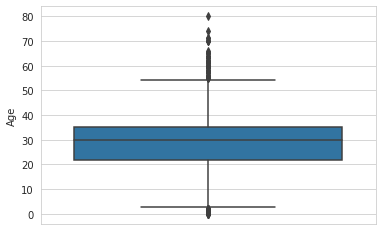

In [14]:
sn.set_style("whitegrid")  
sn.boxplot(y='Age', data=df_train);

Pode-se observar que agora os valores ficaram na faixa de +ou- 55 e +ou- 1. Por considerar até 80 anos um valor possível não vou corrigir os valores fora da faixa etária principal.

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.564534,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.027414,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A seguir será verificado a quantidade de pessoas com a faixa etária de 0(zero) anos.

In [16]:
count = 0
for i in df_train.Age:
  if i == 0:
    count = count + 1

print (f'Existem {count} bebês')

Existem 7 bebês


A seguir estará o gráfico da correlação existente entre valor da passagem e a classe:

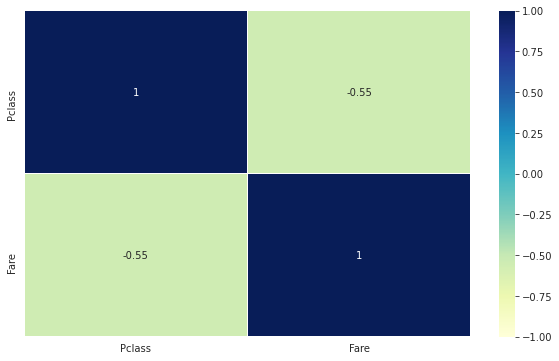

In [17]:
plt.figure(figsize=(10, 6))

corr = df_train[['Pclass', 'Fare']].corr(method = 'pearson')

# Configurar o heatmap
sn.heatmap(corr, linewidths=.2, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

# Imprimir o grafico
plt.show();

É possível observar que existe uma correlação inversamente proporcional, onde quanto mais alta a classe (Ex.: 1 menor o número da classe) maior é o valor da passagem. Porém, é possível observar que provavelmente por conta da classe média (2) esse valor não atingiu -1 no gráfico ficando em torno de -0,5.

In [18]:
df_train[['Pclass', 'Fare']].corr() #tabela de correlação entre classe e valor da passagem

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [19]:
df_train[['Age', 'Fare']].corr() #tabela de correlação entre idade e valor da passagem

,Age,Fare
Age,1.000000,0.091501
Fare,0.091501,1.000000


É possível observar na tabela que quase não existe nenhuma correlação entre a idade e o valor da passagem paga.

A seguir estará uma análise das pessoas que morreram no naufrágio de acordo com o gênero e com a classe:

In [20]:
p_classes = df_train.Pclass.unique()
p_classes = p_classes.tolist()
p_classes.sort()

In [21]:
quantidade_homens = df_train[(df_train.Sex == 'male')].PassengerId.count()
quantidade_homens_mortos = df_train[(df_train.Sex == 'male') & (df_train.Survived == 0)].PassengerId.count()
print(f'Quantidade de total de homens {quantidade_homens} no navio')
print (f'A percentagem de homens que morreram é {quantidade_homens_mortos/quantidade_homens}')
print('\n')
quantidade_mulheres = df_train[(df_train.Sex == 'female')].PassengerId.count()
quantidade_mulheres_mortas = df_train[(df_train.Sex == 'female') & (df_train.Survived == 0)].PassengerId.count()
print(f'Quantidade de total de mulheres {quantidade_mulheres} no navio')
print (f'A percentagem de mulheres que morreram é {quantidade_mulheres_mortas/quantidade_mulheres}')
print('\n')

idade_criancas = 13
quantidade_criancas = df_train[(df_train.Age < idade_criancas)].PassengerId.count()
quantidade_criancas_mortas = df_train[(df_train.Age < idade_criancas) & (df_train.Survived == 0)].PassengerId.count()
print(f'Quantidade de total de crianças menores de {idade_criancas} anos: {quantidade_criancas} no navio')
print (f'A percentagem de crianças que morreram é {quantidade_criancas_mortas/quantidade_criancas}')
print('\n')

for p_class in p_classes:
  quantidade_pessoas_classe = df_train[(df_train.Pclass == p_class)].PassengerId.count()
  quantidade_pessoas_classe_mortas = df_train[(df_train.Pclass == p_class) & (df_train.Survived == 0)].PassengerId.count()
  print(f'Quantidade de total de pessoas da classe {p_class}: {quantidade_pessoas_classe}')
  print (f'A percentagem de pessoas da classe {p_class} que morreram é {quantidade_pessoas_classe_mortas/quantidade_pessoas_classe}')
  print('\n')



Quantidade de total de homens 577 no navio
A percentagem de homens que morreram é 0.8110918544194108


Quantidade de total de mulheres 314 no navio
A percentagem de mulheres que morreram é 0.25796178343949044


Quantidade de total de crianças menores de 13 anos: 69 no navio
A percentagem de crianças que morreram é 0.42028985507246375


Quantidade de total de pessoas da classe 1: 216
A percentagem de pessoas da classe 1 que morreram é 0.37037037037037035


Quantidade de total de pessoas da classe 2: 184
A percentagem de pessoas da classe 2 que morreram é 0.5271739130434783


Quantidade de total de pessoas da classe 3: 491
A percentagem de pessoas da classe 3 que morreram é 0.7576374745417516




É possível observar que no navio haviam mais homens que mulheres. Após o naufrágio a percentagem de homens mortos foi muito maior que de mulheres assim como percentagem de pessoas da primeira classe mortas foi menor que das demais classes.

In [22]:
df_train.Embarked.isnull().sum() #quantidade de pessoas sem dados de embarque

2

Como o número de pessoas sem informação de embarque é pequeno, vamos eliminar esses registros da base:

In [23]:
df_train = df_train[df_train.Embarked.notnull()]

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


In [25]:
df_train = df_train.drop(columns=['Cabin'])
df_train = df_train.drop(columns=['Ticket'])

Como a quantidade de dados referente as cabines é pequena e não é possível em um primeiro momento identificar o número da cabine dos faltantes optou-se por removê-los. Como considerou-se os dados de ticket de pouca relevância para o treinamento também foram removidos. 

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 76.4+ KB


In [27]:
df_train.shape

(889, 10)

A seguir optou-se por criar uma coluna com a titulação separada do nome:

In [28]:
def extrai_titulacao(df):
  df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
extrai_titulacao(df_train)

In [29]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr


Como agora existe uma coluna com as titulações acredita-se que os nomes dos passageiros serão de pouca relevância para o treinamento então essa coluna será removida.

In [30]:
df_train = df_train.drop(columns=['Name'])

In [31]:
df_train.shape

(889, 10)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        889 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 76.4+ KB


**Estimando o desempenho de classificadores**

Considerando o conjunto de dados de treinamento do desafio "Titanic: Machine Learning from Disaster" do Kaggle (https://www.kaggle.com/c/titanic) e usando Jupyter Notebook ou Google Colab, faça: 

1) Usando as SVM, obtenha um classificador e estimene o seu desempenho usando validação cruzada com 10 folds. Para cada conjunto de treinamento, use a técnica de Grid Search para encontrar os melhores valores de parâmetros com o Kernel RBF. Como resultado final, apresente a média e o desvio padrão das acurácias.

2) Escolha uma outra técnica de indução de classificadores e faça a mesma avaliação do item anterior.



**Classificador SVM com Grid Search e validação cruzada com 10 folds**

In [33]:
#classificadores
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #Essa técnica irá testar todas as combinações possíveis dos hiperparâmetros, exaustivamente. 
from sklearn.model_selection import RandomizedSearchCV #Essa técnica irá testar combinações aleatórias e os melhores resultados funciona como um guia para a escolha dos próximos hiperparâmetros. (Pode acabar presa em mínimos locais.)

#pré-processamento
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler #fornece várias funções e classes de transformador para alterar vetores de recursos brutos em uma representação que seja mais adequada para os estimadores.

In [34]:
df_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22,1,0,7.2500,S,Mr
1,2,1,1,female,38,1,0,71.2833,C,Mrs
2,3,1,3,female,26,0,0,7.9250,S,Miss
3,4,1,1,female,35,1,0,53.1000,S,Mrs
4,5,0,3,male,35,0,0,8.0500,S,Mr


In [35]:
df_train.corr() #tabela de correlação

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.083826,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.331189,0.081656,0.016824,-0.548193
Age,0.033411,-0.083826,-0.331189,1.000000,-0.236648,-0.179009,0.088525
SibSp,-0.057686,-0.034040,0.081656,-0.236648,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.179009,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088525,0.160887,0.217532,1.000000


In [36]:
#codificação de labels para gênero
le = preprocessing.LabelEncoder()
le.fit(pd.unique(df_train.Sex))
sex_t = le.transform(df_train.Sex) #imprimir classes distintas

#codificação de labels para embarcado
le = preprocessing.LabelEncoder()
le.fit(pd.unique(df_train.Embarked))
embarked_t = le.transform(df_train.Embarked)#imprimir classes distintas

#codificação de labels para titulação
le = preprocessing.LabelEncoder()
le.fit(pd.unique(df_train.Title))
title_t = le.transform(df_train.Title)#imprimir classes distintas

In [37]:
title_t #titulações codificadas

array([11, 12,  8, 12, 11, 11, 11,  7, 12, 12,  8,  8, 11, 11,  8, 12,  7,
       11, 12, 12, 11, 11,  8, 11,  8, 12, 11, 11,  8, 11,  2, 12,  8, 11,
       11, 11, 11, 11,  8,  8, 12, 12, 11,  8,  8, 11, 11,  8, 11, 12,  7,
       11, 12, 12, 11, 11,  8, 11,  8,  7, 11, 11,  7, 11,  7, 12, 11,  8,
       11, 11,  8, 11, 11, 11, 11, 11, 11,  7,  8, 11, 11,  8, 11,  8, 12,
       11, 11,  8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11,  8, 11, 11,
       11, 11, 11,  8, 11, 11,  8, 11,  8, 11,  8,  8, 11, 11, 11, 11,  8,
       11, 11, 11,  8, 11,  7, 11, 11,  8, 11, 11, 11, 12, 12, 11, 11,  8,
       11, 11, 11, 12,  8, 12, 11, 11, 11, 11,  8, 11, 14, 14, 12, 11, 11,
       11, 11,  8, 11, 11,  7, 11, 12, 11, 11,  7,  7, 12, 12, 11, 11, 11,
        7,  8, 11, 11, 11,  7,  8, 11, 11,  8, 11,  7,  7,  8, 11, 12, 11,
       11, 11, 12, 11,  8,  7, 12,  8, 11, 11,  8,  8, 11, 11, 11, 11, 11,
        8, 11, 11,  8, 11, 11,  8, 11, 11, 11,  8,  8, 11,  8, 11, 11, 11,
       11, 11, 11, 11, 11

Os valores que foram codificados ainda não foram substituídos

In [38]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22,1,0,7.2500,S,Mr
1,2,1,1,female,38,1,0,71.2833,C,Mrs
2,3,1,3,female,26,0,0,7.9250,S,Miss
3,4,1,1,female,35,1,0,53.1000,S,Mrs
4,5,0,3,male,35,0,0,8.0500,S,Mr


In [39]:
df_train.shape

(889, 10)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int64  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        889 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 76.4+ KB


In [41]:
Y = df_train.iloc[:,1] #definindo y como sobreviventes
df_train = df_train.iloc[:,[2,3,4,5,6,7,8,9]] #restante dos dados, ignorando id dos passageiros

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    int64  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.5+ KB


Substituindo os valores que foram codificados:

In [43]:
df_train.iloc[:,1] = sex_t

df_train.iloc[:,6] = embarked_t

df_train.iloc[:,7] = title_t 

print(df_train.head(5))

   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title
0       3    1   22      1      0   7.2500         2     11
1       1    0   38      1      0  71.2833         0     12
2       3    0   26      0      0   7.9250         2      8
3       1    0   35      1      0  53.1000         2     12
4       3    1   35      0      0   8.0500         2     11


In [44]:
# normalizar/dimensionar dados
scaler = StandardScaler()
scaler.fit(df_train.values) #treinamento
X_train = scaler.transform(df_train)

In [45]:
X_train[:,2] #exibindo idade normalizada/dimensionada

array([-0.57896973,  0.65311666, -0.27094813,  0.42210046,  0.42210046,
        0.03707347,  1.88520304, -2.11907771, -0.19394273, -1.19501292,
       -1.96506691,  2.19322464, -0.73298052,  0.73012206, -1.19501292,
        1.96220844, -2.11907771,  0.03707347,  0.11407886, -0.19394273,
        0.42210046,  0.34509506, -1.11800752, -0.11693733, -1.65704531,
        0.65311666,  0.03707347, -0.80998592, -0.19394273,  0.03707347,
        0.80712745, -0.19394273, -0.19394273,  2.80926783, -0.11693733,
        0.96113825,  0.03707347, -0.65597513, -0.88699132, -1.19501292,
        0.80712745, -0.19394273,  0.03707347, -2.04207231, -0.80998592,
        0.03707347,  0.03707347, -0.19394273,  0.03707347, -0.88699132,
       -1.73405071, -0.65597513,  1.50017605, -0.03993193,  2.73226243,
        0.03707347, -0.65597513, -0.11693733, -1.88806151, -1.42602911,
       -0.57896973,  1.19215445, -1.96506691,  0.03707347,  0.03707347,
       -0.03993193, -0.80998592, -0.96399672, -0.27094813,  0.19

In [46]:
#Função para coletar os resultados das métricas de avaliação
def printAccuracies(fold, cv_result):
  for i in range (0,fold):
    print(cv_result[f'split{i}_test_score'][0])

In [47]:
fold = 10 #validação cruzada com 10 folds

In [48]:
#svm com grid search cross-validation
svm = SVC(random_state=42)
parameters = {'kernel': ['rbf']} #radial basis function kernel
clf_svm = GridSearchCV(estimator = svm, param_grid=parameters, cv = fold, scoring='accuracy')

result = clf_svm.fit(X_train,Y)

mean = result.cv_results_['mean_test_score'][0]
print(f'Accuracy AVG: {mean}') #média das acurácias
std = result.cv_results_['std_test_score'][0]
print(f'Accuracy STD: {std}') #desvio padrão das acurácias
printAccuracies(fold, result.cv_results_) #todas as acurácias

Accuracy AVG: 0.8301838610827375
Accuracy STD: 0.03828003992660433
0.8089887640449438
0.8764044943820225
0.7640449438202247
0.8764044943820225
0.8426966292134831
0.797752808988764
0.8202247191011236
0.7865168539325843
0.8651685393258427
0.8636363636363636


In [49]:
#svm com randomized search cross-validation
svm = SVC(random_state=42)
parameters = {'kernel': ['rbf']}
clf_svm_r = RandomizedSearchCV(estimator = svm, param_distributions=parameters, cv = fold)

result = clf_svm_r.fit(X_train,Y)

mean = result.cv_results_['mean_test_score'][0]
print(f'Accuracy AVG: {mean}')
std = result.cv_results_['std_test_score'][0]
print(f'Accuracy STD: {std}')
printAccuracies(fold, result.cv_results_)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Accuracy AVG: 0.8301838610827375
Accuracy STD: 0.03828003992660433
0.8089887640449438
0.8764044943820225
0.7640449438202247
0.8764044943820225
0.8426966292134831
0.797752808988764
0.8202247191011236
0.7865168539325843
0.8651685393258427
0.8636363636363636


In [50]:
clf_svm.best_params_ #melhores parâmetros selecionados dos que foram passados 

{'kernel': 'rbf'}

**Classificador Floresta Randômica com Grid Search e validação cruzada com 10 folds**

In [51]:
RFC = RandomForestClassifier(random_state=42)

In [52]:
#Floresta Randômica com grid search cross-validation
parameters = {'n_estimators': [100, 200], 'max_depth':[2, 3, 4, 5]}
clf_rfc_g = GridSearchCV(estimator = RFC, param_grid = parameters, cv = fold)

result = clf_rfc_g.fit(X_train,Y)

mean = result.cv_results_['mean_test_score'][0]
print(f'Accuracy AVG: {mean}')
std = result.cv_results_['std_test_score'][0]
print(f'Accuracy STD: {std}')
printAccuracies(fold, result.cv_results_)

Accuracy AVG: 0.7850995914198161
Accuracy STD: 0.0360602597505721
0.7865168539325843
0.7640449438202247
0.7752808988764045
0.8651685393258427
0.797752808988764
0.797752808988764
0.7865168539325843
0.7303370786516854
0.8089887640449438
0.7386363636363636


In [54]:
clf_rfc_g.best_params_ #melhores parâmetros selecionados dos que foram passados 

{'max_depth': 5, 'n_estimators': 200}

In [55]:
#Floresta Randômica com randomized search cross-validation
parameters = {'n_estimators': [100, 200], 'max_depth':[2, 3, 4, 5]}
clf_rfc_r = RandomizedSearchCV(estimator = RFC, param_distributions= parameters, cv = fold)

result = clf_rfc_r.fit(X_train,Y)

mean = result.cv_results_['mean_test_score'][0]
print(f'Accuracy AVG: {mean}')
std = result.cv_results_['std_test_score'][0]
print(f'Accuracy STD: {std}')
printAccuracies(fold, result.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Accuracy AVG: 0.7850995914198161
Accuracy STD: 0.0360602597505721
0.7865168539325843
0.7640449438202247
0.7752808988764045
0.8651685393258427
0.797752808988764
0.797752808988764
0.7865168539325843
0.7303370786516854
0.8089887640449438
0.7386363636363636
